<a href="https://colab.research.google.com/github/YuvinMahwatta/Bank_Client_Prediction/blob/main/CM_2604_20230661_2330898Cw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning Coursework

##Data Preproccesing

###Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###Separate colmns in the dataset

In [2]:
file_path = 'bank-additional-full.csv' #Assigned the dataset to the variable
df = pd.read_csv(file_path,delimiter=';')

new_file_path = 'bank_additional_new.csv'
df.to_csv(new_file_path, index=False)

print(f"New dataset saved as {new_file_path}") #Assigned new dataset

New dataset saved as bank_additional_new.csv


###Importing the dataset

In [3]:
file_path = 'bank_additional_new.csv'
df = pd.read_csv(file_path)
df.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
33337,32,blue-collar,single,basic.9y,no,yes,no,cellular,may,tue,...,2,999,1,failure,-1.8,92.893,-46.2,1.291,5099.1,no
5086,53,admin.,married,basic.9y,no,no,no,telephone,may,fri,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
24818,32,blue-collar,married,basic.9y,no,no,no,cellular,nov,tue,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
16293,41,services,single,unknown,unknown,no,no,cellular,jul,tue,...,13,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
31335,44,blue-collar,married,basic.6y,no,no,no,cellular,may,wed,...,1,999,1,failure,-1.8,92.893,-46.2,1.334,5099.1,no


### Handling the duplicates

In [4]:
count = df.duplicated().sum()
print(f"Number of duplicates: {count}") #Displays count of the duplicates

Number of duplicates: 12


In [5]:
if count > 0:
  duplicates = df[df.duplicated()]
  print(duplicates)

       age          job   marital            education  default housing loan  \
1266    39  blue-collar   married             basic.6y       no      no   no   
12261   36      retired   married              unknown       no      no   no   
14234   27   technician    single  professional.course       no      no   no   
16956   47   technician  divorced          high.school       no     yes   no   
18465   32   technician    single  professional.course       no     yes   no   
20216   55     services   married          high.school  unknown      no   no   
20534   41   technician   married  professional.course       no     yes   no   
25217   39       admin.   married    university.degree       no      no   no   
28477   24     services    single          high.school       no     yes   no   
32516   35       admin.   married    university.degree       no     yes   no   
36951   45       admin.   married    university.degree       no      no   no   
38281   71      retired    single    uni

In [6]:
df_clean = df.drop_duplicates()
print(f"Number of duplicates after cleaning: {df_clean.duplicated().sum()}") #Displays the count of the duplicates after removing them

Number of duplicates after cleaning: 0


###Removing unwanted columns

In [7]:
df = df_clean.drop(['duration','default'], axis=1) #Removed the duration and default columns
df.sample(5)

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
7186,55,housemaid,single,basic.9y,no,no,telephone,may,thu,1,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no
19519,43,admin.,single,university.degree,no,yes,cellular,aug,thu,3,999,0,nonexistent,1.4,93.444,-36.1,4.968,5228.1,no
15036,28,blue-collar,single,basic.9y,no,no,cellular,jul,thu,2,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
23212,42,management,married,university.degree,no,yes,cellular,aug,tue,3,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
33087,35,admin.,single,high.school,yes,no,cellular,may,tue,5,999,0,nonexistent,-1.8,92.893,-46.2,1.291,5099.1,no


### Checking and handeling outliers

### Checking outliers

In [8]:
numerical_cols = df.select_dtypes(include=np.number).columns #Selects the numerical columns in the dataset

outlier_counts = {} #Dictionary for store the count of outliers
for col in numerical_cols:
    Q1 = df[col].quantile(0.25) #Calculating Quartiles and IQR
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_counts[col] = len(outliers)

for col, count in outlier_counts.items():
    print(f"Number of outliers in {col}: {count}")

total_outliers = sum(outlier_counts.values())
print(f"\nTotal number of outliers across all numerical columns: {total_outliers}")

Number of outliers in age: 468
Number of outliers in campaign: 2406
Number of outliers in pdays: 1515
Number of outliers in previous: 5625
Number of outliers in emp.var.rate: 0
Number of outliers in cons.price.idx: 0
Number of outliers in cons.conf.idx: 446
Number of outliers in euribor3m: 0
Number of outliers in nr.employed: 0

Total number of outliers across all numerical columns: 10460


### **Displaying the outliers in a plot**

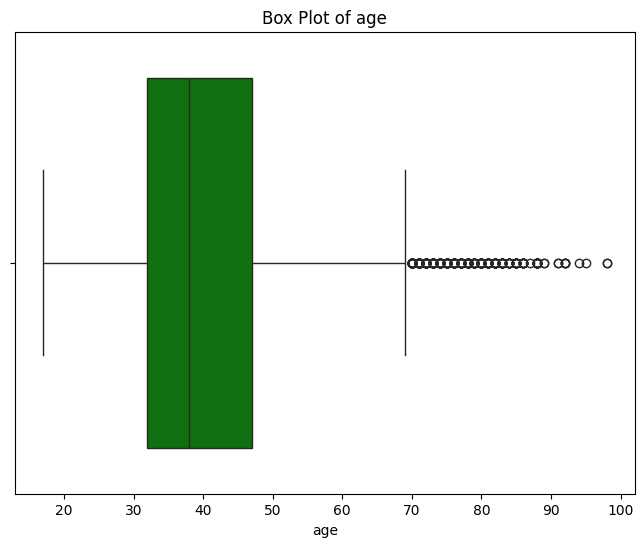

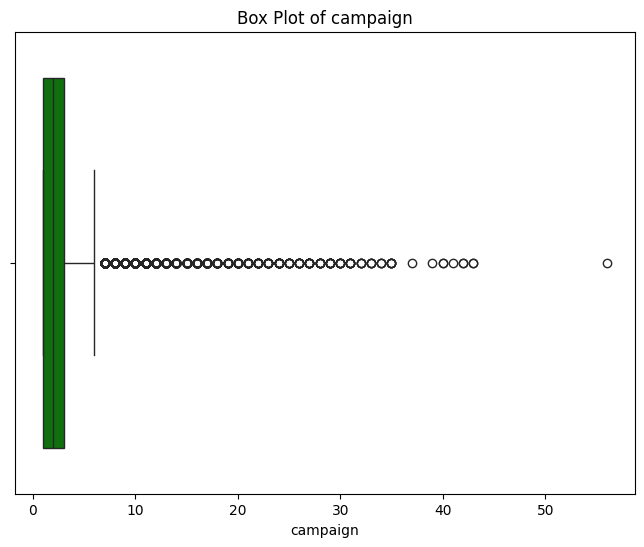

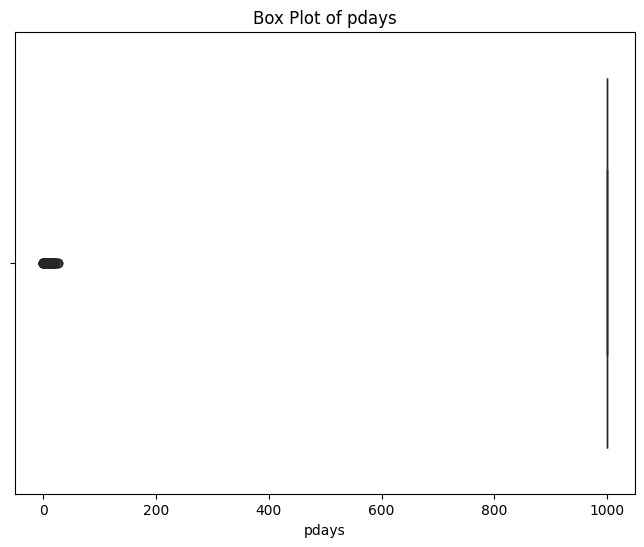

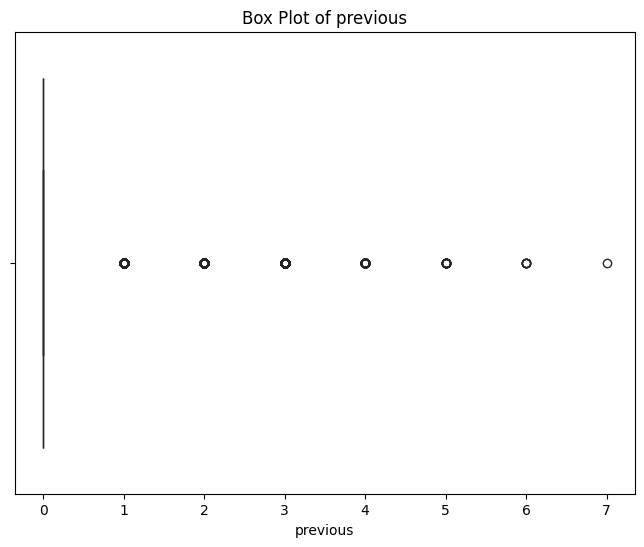

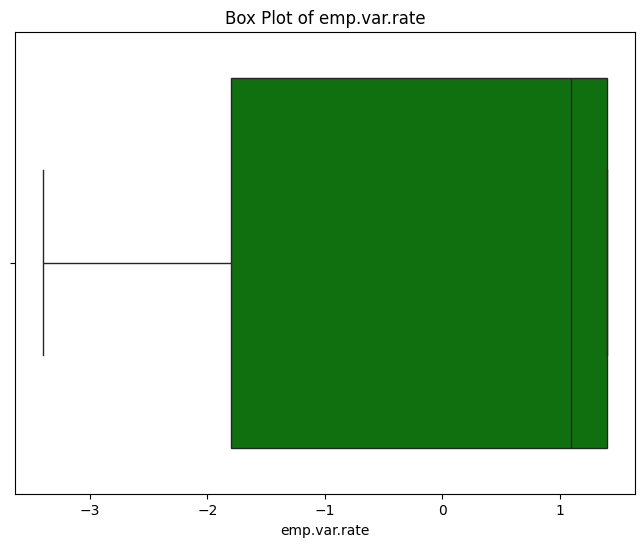

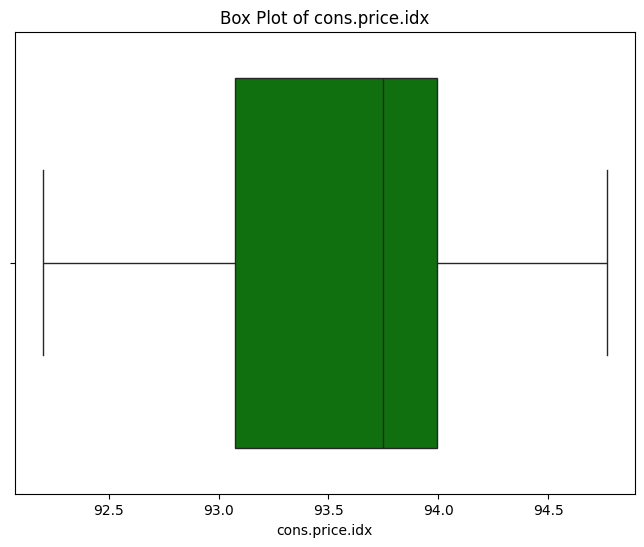

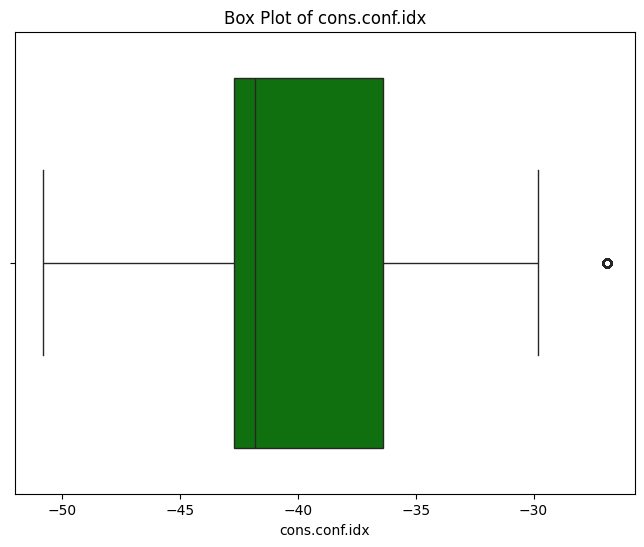

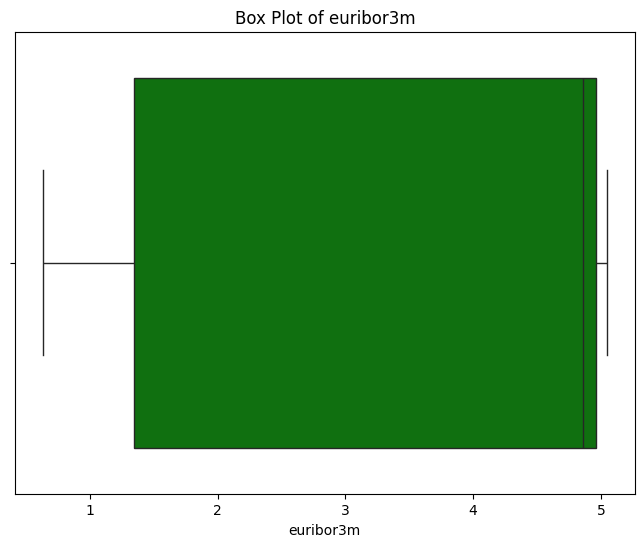

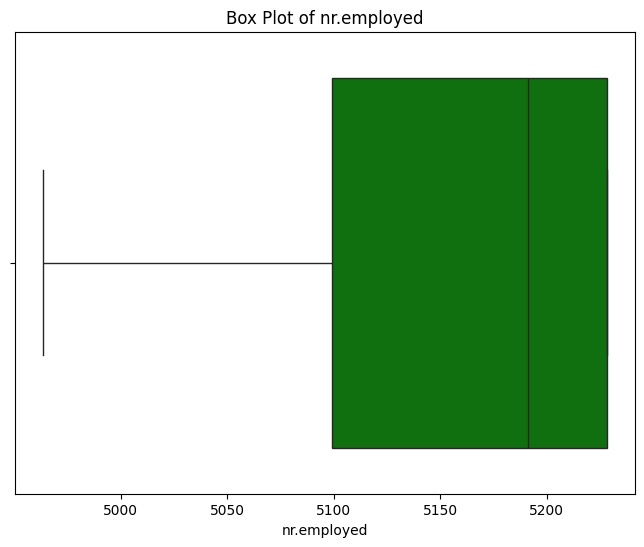

In [9]:

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col], color='green')
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

In [10]:
df.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Handeling the outliers

In [11]:
from sklearn.impute import KNNImputer

cols_to_handle = ['age', 'campaign', 'cons.conf.idx'] #Columns that are needed to be handled

for col in cols_to_handle:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    df_copy = df.copy()
    df_copy.loc[outliers.index, col] = np.nan

    #Apply KNN Imputation
    imputer = KNNImputer(n_neighbors=5)
    df_copy[col] = imputer.fit_transform(df_copy[[col]])[:,0]

    df[col] = df_copy[col]

print(df.describe())

                age      campaign         pdays      previous  emp.var.rate  \
count  41176.000000  41176.000000  41176.000000  41176.000000  41176.000000   
mean      39.599391      2.044338    962.464810      0.173013      0.081922   
std        9.620097      1.242369    186.937102      0.494964      1.570883   
min       17.000000      1.000000      0.000000      0.000000     -3.400000   
25%       32.000000      1.000000    999.000000      0.000000     -1.800000   
50%       38.000000      2.000000    999.000000      0.000000      1.100000   
75%       47.000000      3.000000    999.000000      0.000000      1.400000   
max       69.000000      6.000000    999.000000      7.000000      1.400000   

       cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count    41176.000000   41176.000000  41176.000000  41176.000000  
mean        93.575720     -40.651817      3.621293   5167.034870  
std          0.578839       4.403504      1.734437     72.251364  
min         92.20100

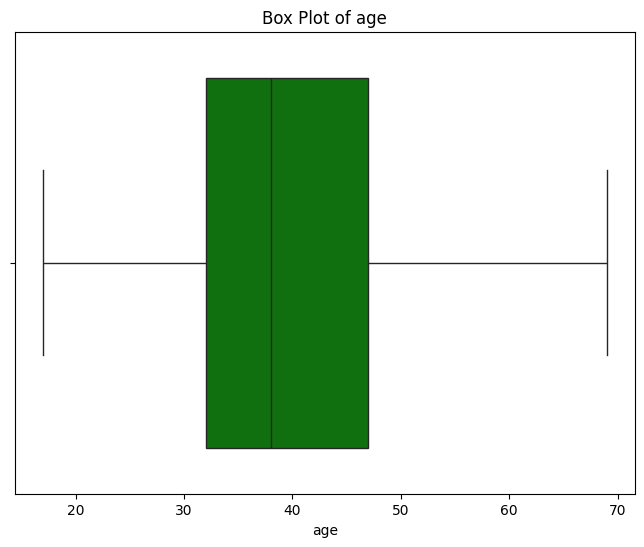

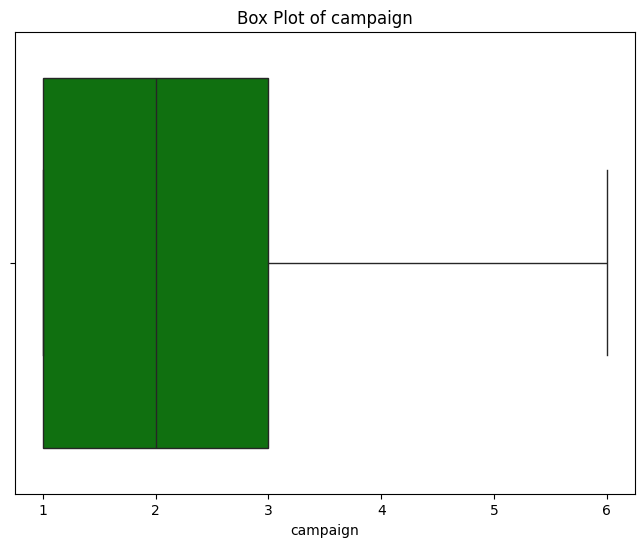

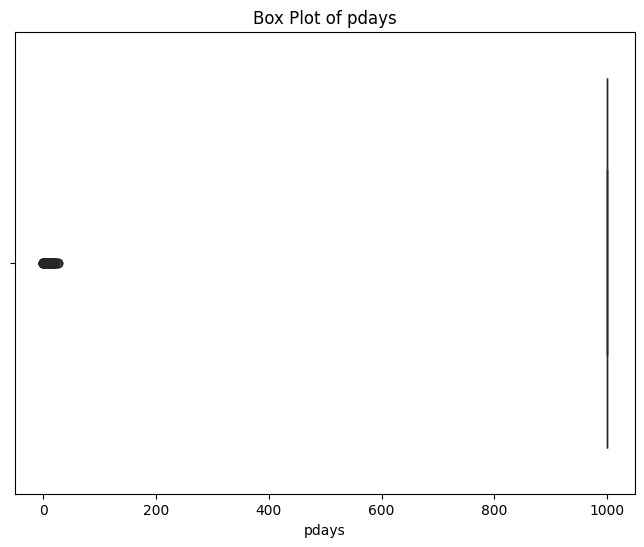

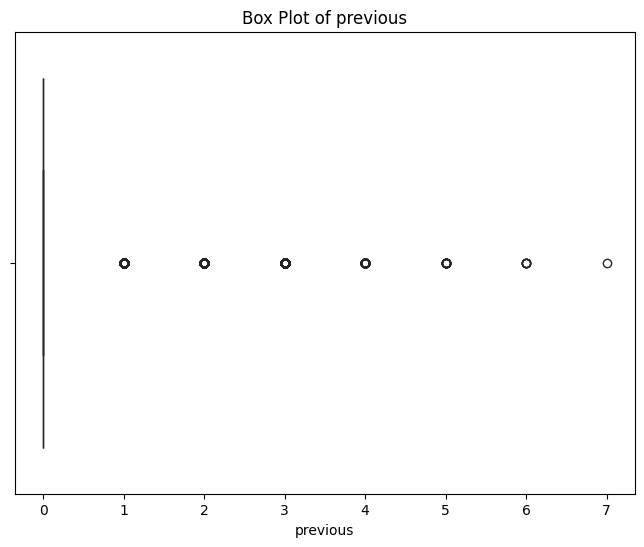

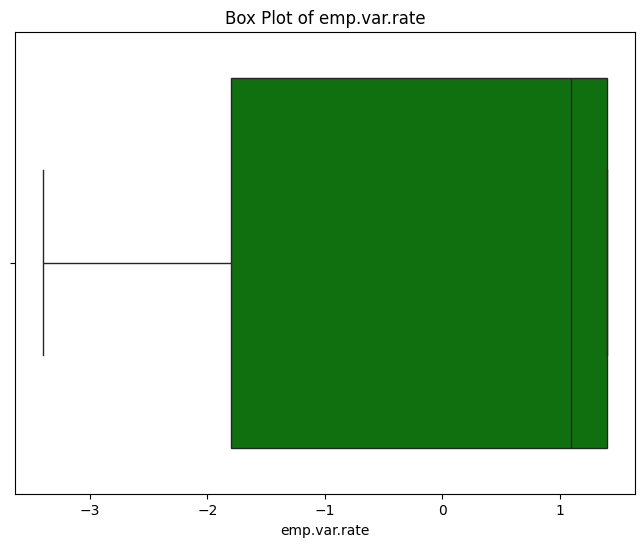

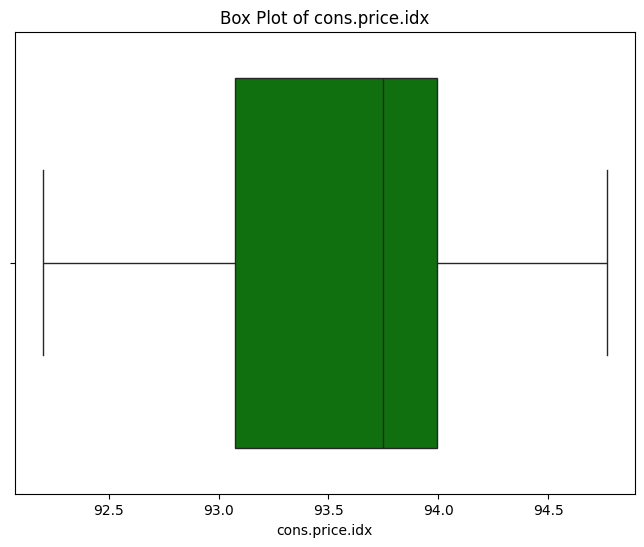

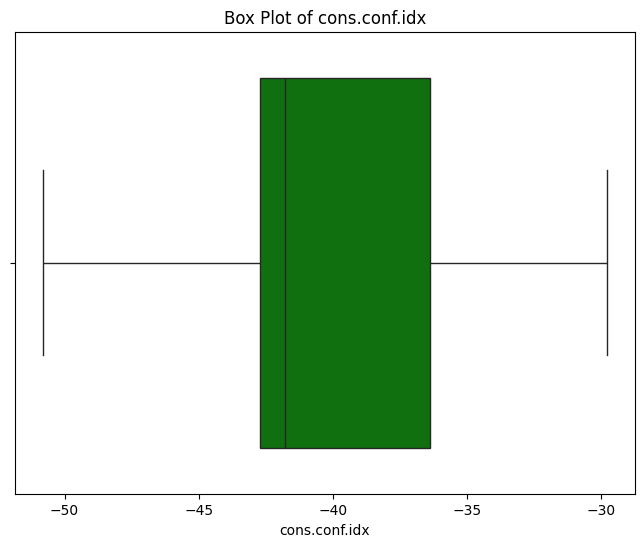

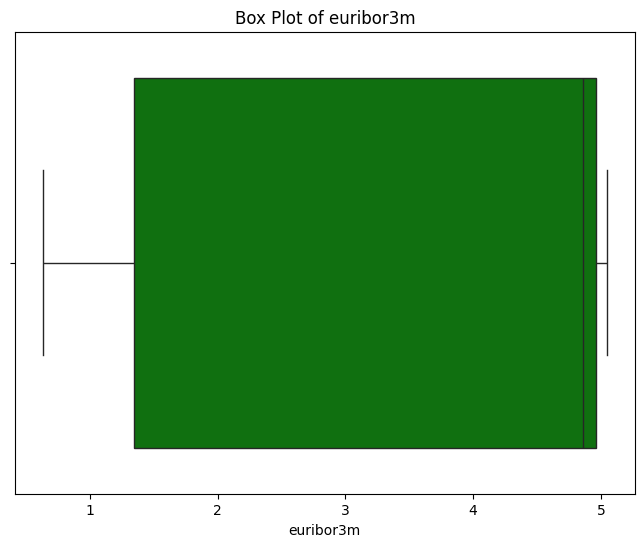

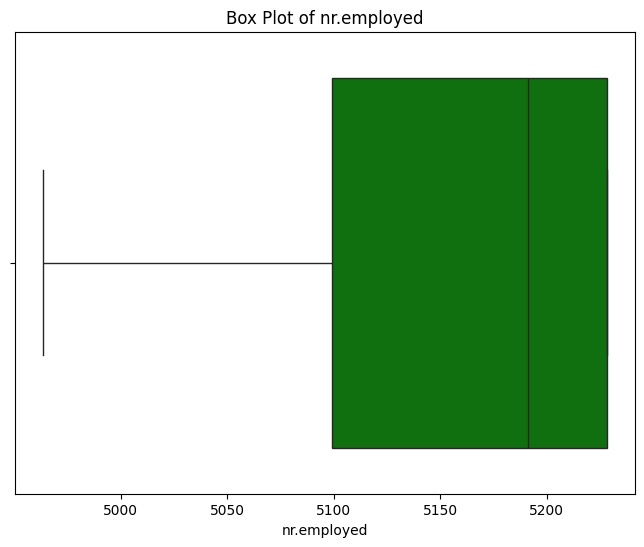

In [12]:
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col], color='green')
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

In [13]:
df.sample(5)

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
16398,23.0,admin.,single,professional.course,yes,no,cellular,jul,wed,1.0,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
32542,47.0,blue-collar,married,high.school,yes,yes,telephone,may,fri,6.0,6,1,success,-1.8,92.893,-46.2,1.313,5099.1,no
3076,30.0,blue-collar,married,basic.9y,no,yes,telephone,may,thu,2.0,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no
31027,27.0,technician,single,professional.course,yes,no,cellular,may,tue,1.0,999,0,nonexistent,-1.8,92.893,-46.2,1.344,5099.1,no
12390,34.0,technician,single,university.degree,no,yes,cellular,jul,mon,5.0,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no


### **Encoding**

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #Initializing the labelencoder
for col in ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome','y']:
   df[col] = le.fit_transform(df[col])

df

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.000000,3,1,0,0,0,1,6,1,1.0,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57.000000,7,1,3,0,0,1,6,1,1.0,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37.000000,7,1,3,2,0,1,6,1,1.0,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40.000000,0,1,1,0,0,1,6,1,1.0,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56.000000,7,1,3,0,2,1,6,1,1.0,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,39.599391,5,1,5,2,0,0,7,0,1.0,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46.000000,1,1,5,0,0,0,7,0,1.0,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56.000000,5,1,6,2,0,0,7,0,2.0,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44.000000,9,1,5,0,0,0,7,0,1.0,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


### Correlection Matrix

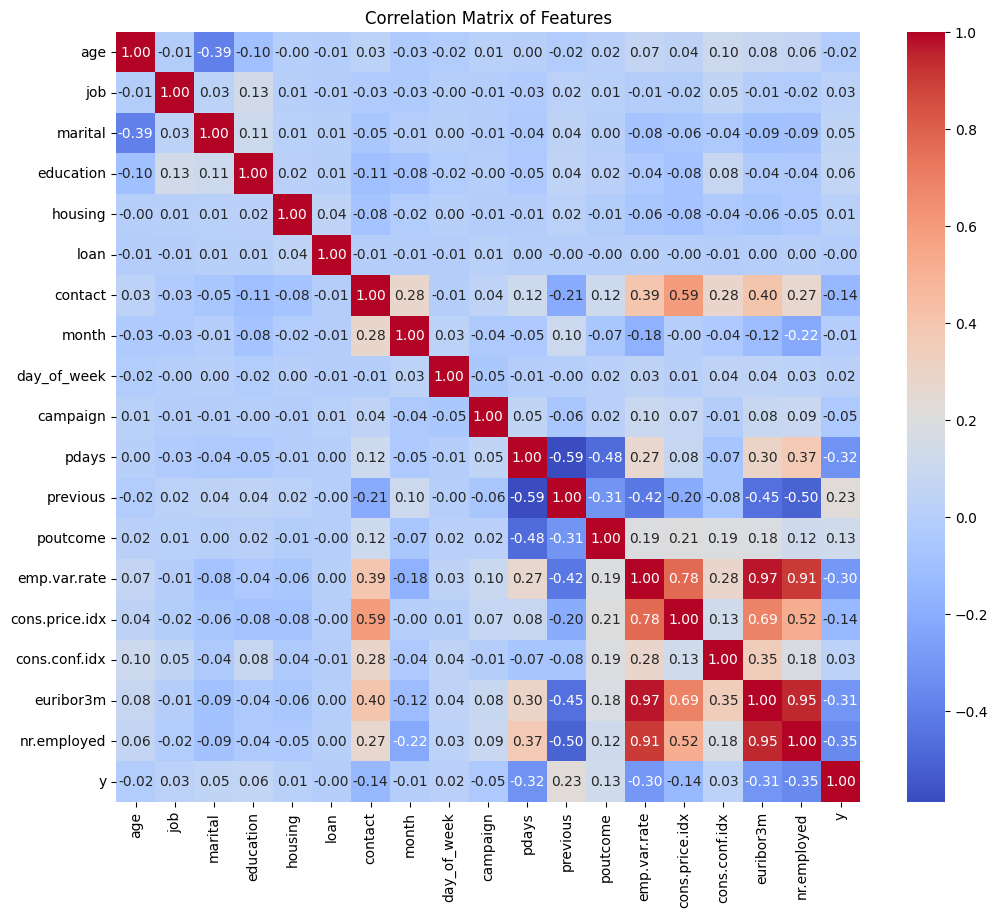

In [15]:
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

### preprocessed dataset

In [16]:
new_dataset = 'bank_additional_final.csv' #New variable to save the final dataset
df.to_csv(new_dataset, index=False)

print(f"New dataset saved as {new_dataset}")

New dataset saved as bank_additional_final.csv


## **Random Forest Model**

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE


file_path = "bank_additional_final.csv"

# Load the dataset
data = pd.read_csv(file_path)

X = data.drop('y', axis=1)  # Features
y = data['y']

#Splitting the dataset to testing data and trainning data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train RandomForest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=15)
rf_model.fit(X_train, y_train)


y_pred_rf = rf_model.predict(X_test) #Predictions

# Evaluation on training set
print("Training dataset")
print(classification_report(y_train, rf_model.predict(X_train)))

# Evaluation on test set
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print("Testing dataset")
print(report_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

# Calculate ROC AUC Score
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba_rf)

print(f"ROC AUC Score: {roc_auc:.2f}")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Training dataset
              precision    recall  f1-score   support

           0       0.91      0.96      0.94     29272
           1       0.96      0.91      0.93     29272

    accuracy                           0.94     58544
   macro avg       0.94      0.94      0.93     58544
weighted avg       0.94      0.94      0.93     58544

Testing dataset
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      7265
           1       0.49      0.46      0.47       971

    accuracy                           0.88      8236
   macro avg       0.71      0.70      0.70      8236
weighted avg       0.88      0.88      0.88      8236

Random Forest Accuracy: 0.8788246721709567
ROC AUC Score: 0.78
